In [5]:
#Load the csv file as data frame.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('../data/weatherAUS.csv')
print('Size of weather data frame is :',df.shape)

Size of weather data frame is : (142193, 24)


In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
df.count().sort_values()


Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

In [8]:
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],axis=1)

In [9]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [10]:
df.shape

(142193, 17)

In [11]:
df = df.dropna()
df.shape

(112925, 17)

In [12]:
df.RainToday.value_counts()

No     87556
Yes    25369
Name: RainToday, dtype: int64

In [13]:
df.RainTomorrow.value_counts()

No     87906
Yes    25019
Name: RainTomorrow, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['RainToday']= encoder.fit_transform(df['RainToday'])

In [16]:
df.RainToday.value_counts()

0    87556
1    25369
Name: RainToday, dtype: int64

In [17]:
df['RainTomorrow']= encoder.fit_transform(df['RainTomorrow'])

In [18]:
df.RainTomorrow.value_counts()

0    87906
1    25019
Name: RainTomorrow, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

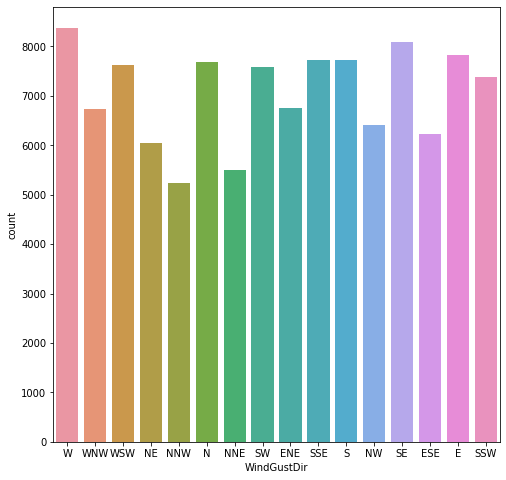

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='WindGustDir')

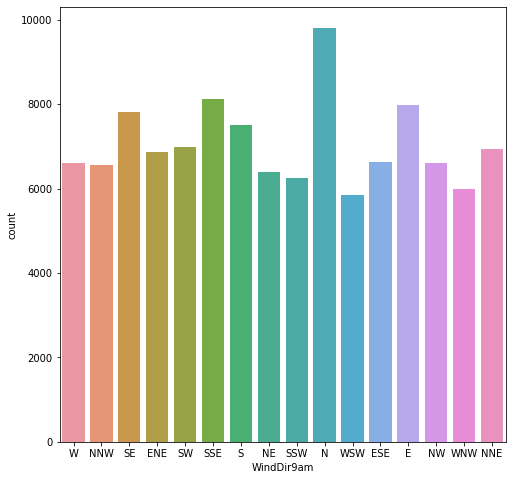

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='WindDir9am')

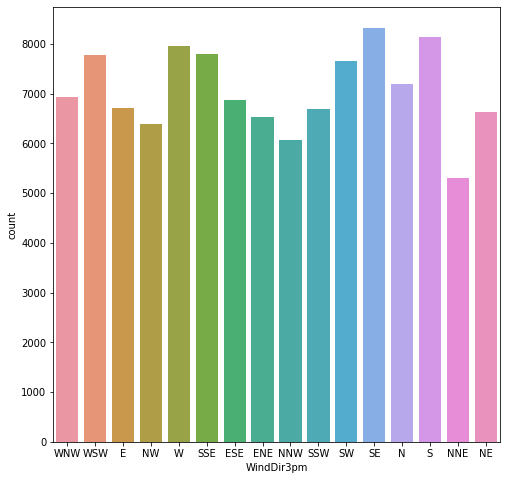

In [22]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='WindDir3pm')

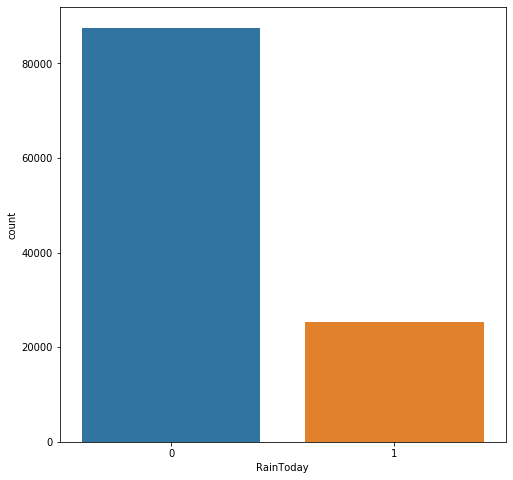

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='RainToday')

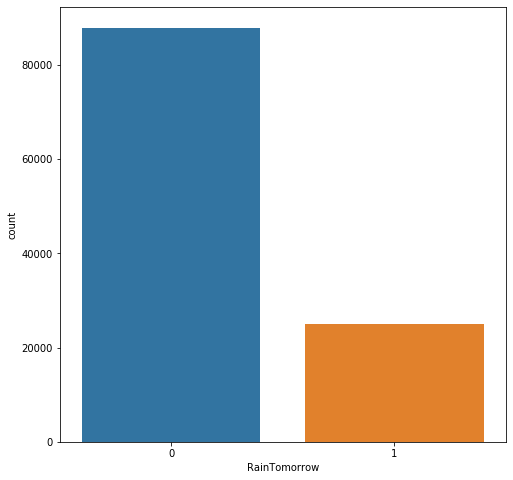

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='RainTomorrow')

/Users/davidwan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

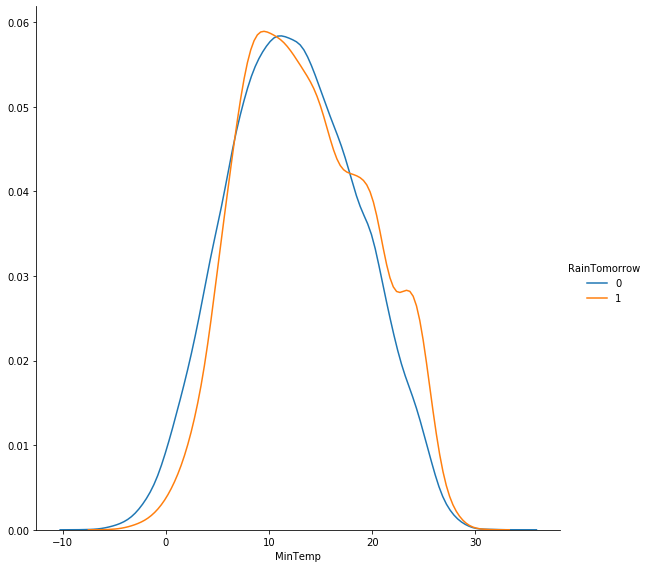

In [25]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df, hue="RainTomorrow", size=8).map(sns.kdeplot, "MinTemp").add_legend()
plt.ioff() 
plt.show()

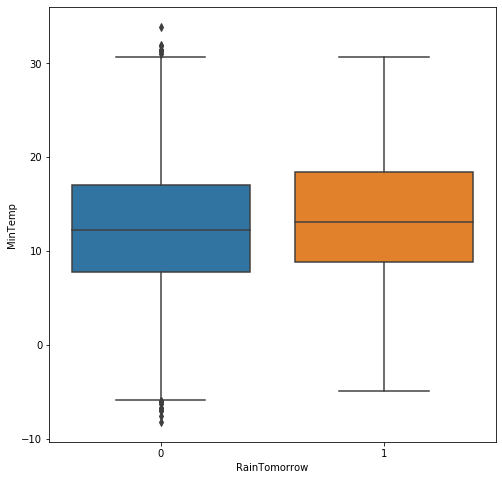

In [26]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="RainTomorrow",y="MinTemp")

/Users/davidwan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

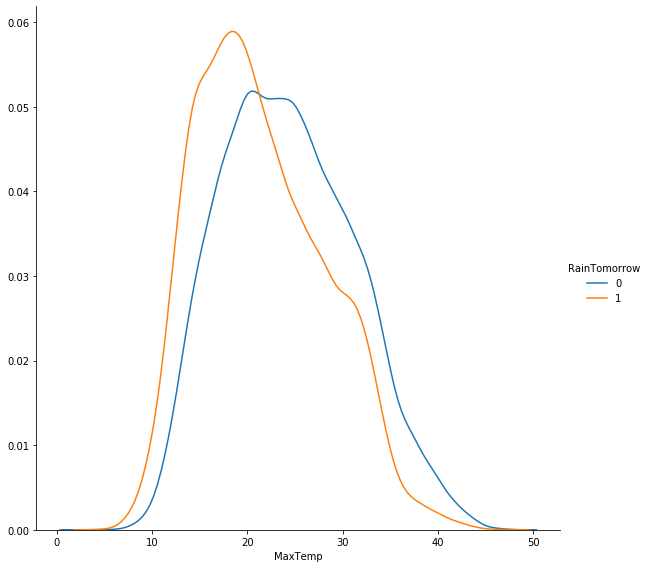

In [27]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df, hue="RainTomorrow", size=8).map(sns.kdeplot, "MaxTemp").add_legend()
plt.ioff() 
plt.show()

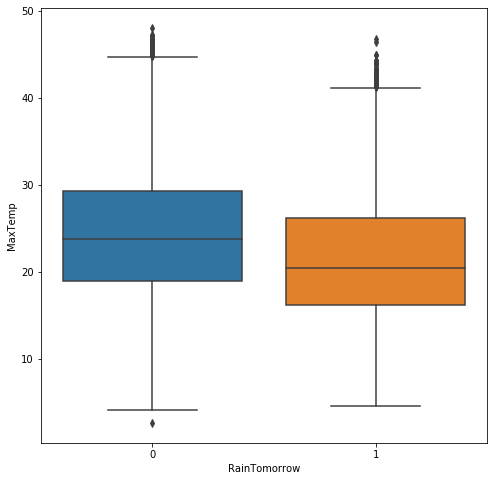

In [28]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="RainTomorrow",y="MaxTemp")

/Users/davidwan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

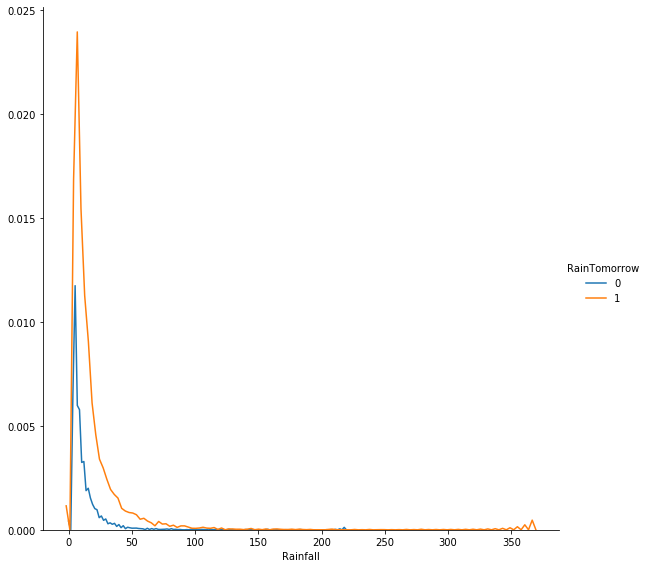

In [29]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df, hue="RainTomorrow", size=8).map(sns.kdeplot, "Rainfall").add_legend()
plt.ioff() 
plt.show()

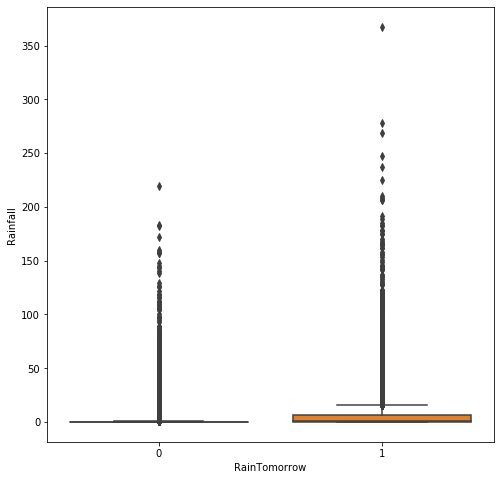

In [30]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="RainTomorrow",y="Rainfall")

/Users/davidwan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

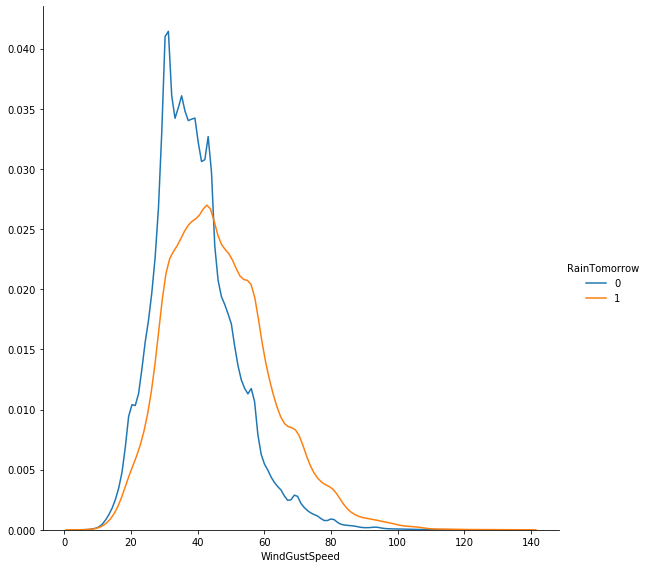

In [31]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df, hue="RainTomorrow", size=8).map(sns.kdeplot, "WindGustSpeed").add_legend()
plt.ioff() 
plt.show()

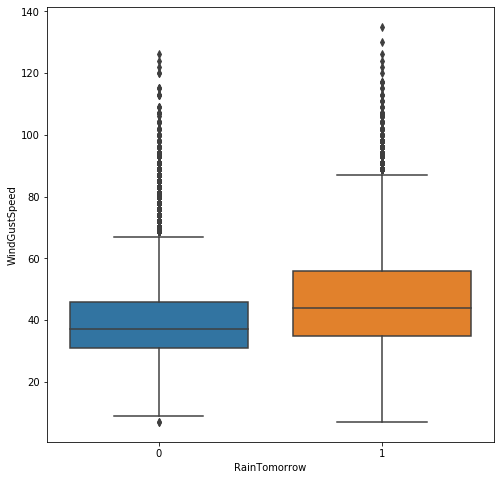

In [32]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="RainTomorrow",y="WindGustSpeed")

/Users/davidwan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

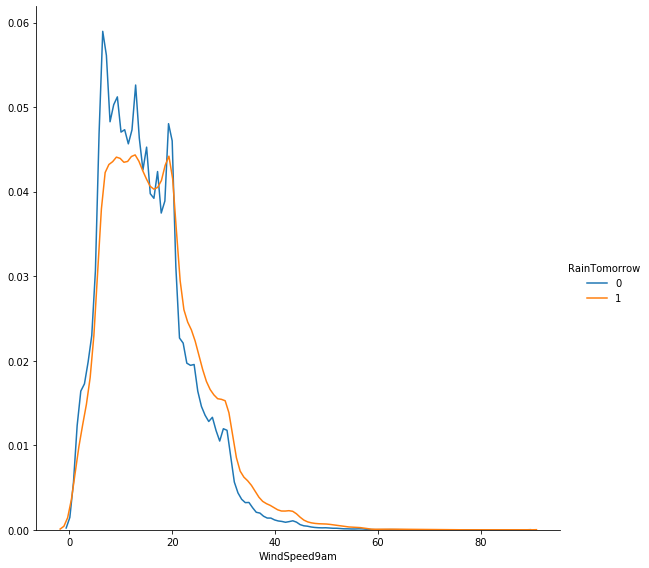

In [33]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df, hue="RainTomorrow", size=8).map(sns.kdeplot, "WindSpeed9am").add_legend()
plt.ioff() 
plt.show()

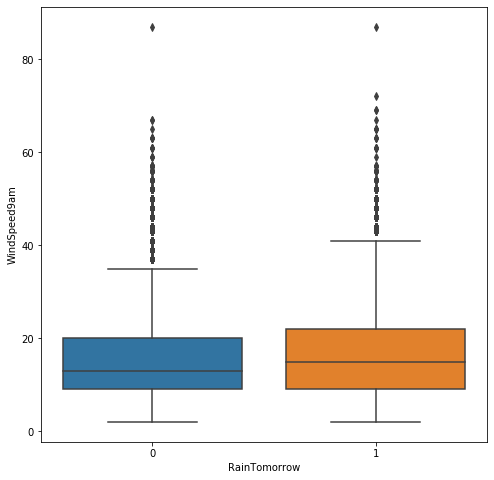

In [34]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="RainTomorrow",y="WindSpeed9am")

/Users/davidwan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

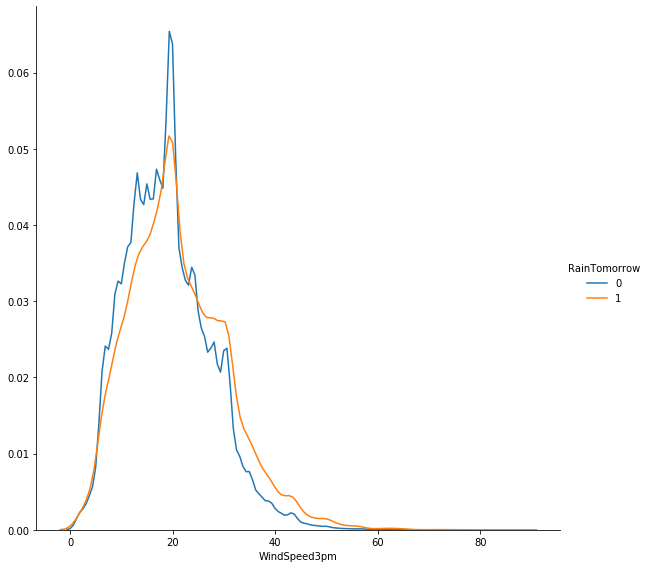

In [35]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df, hue="RainTomorrow", size=8).map(sns.kdeplot, "WindSpeed3pm").add_legend()
plt.ioff() 
plt.show()

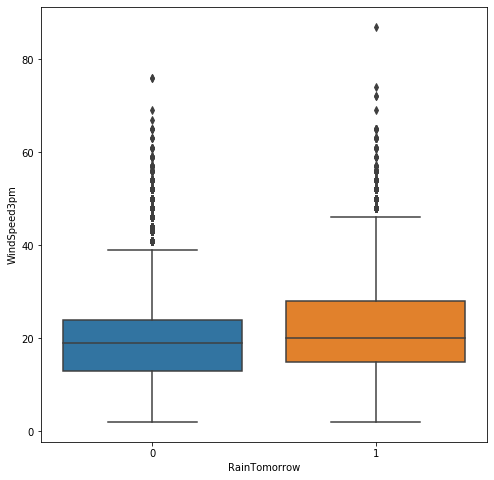

In [36]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="RainTomorrow",y="WindSpeed3pm")

/Users/davidwan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

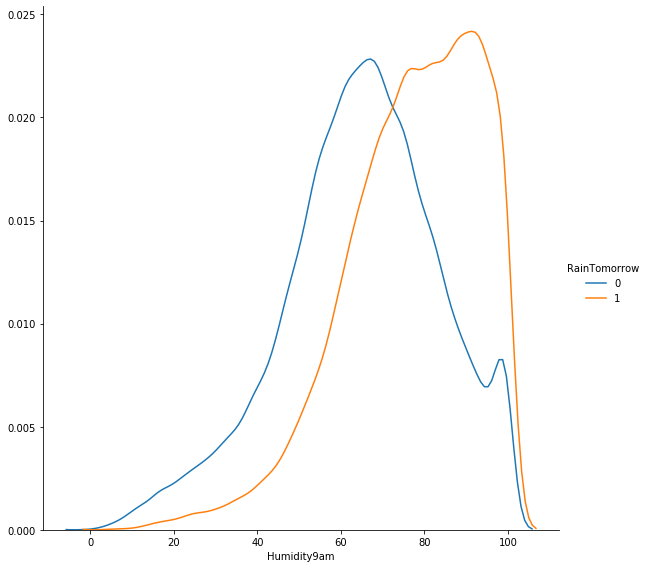

In [37]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df, hue="RainTomorrow", size=8).map(sns.kdeplot, "Humidity9am").add_legend()
plt.ioff() 
plt.show()

<Figure size 576x576 with 0 Axes>

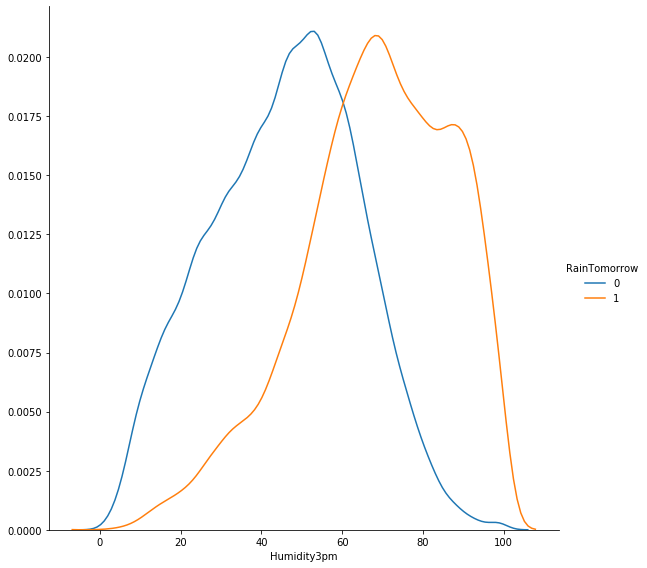

In [38]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df, hue="RainTomorrow", size=8).map(sns.kdeplot, "Humidity3pm").add_legend()
plt.ioff() 
plt.show()

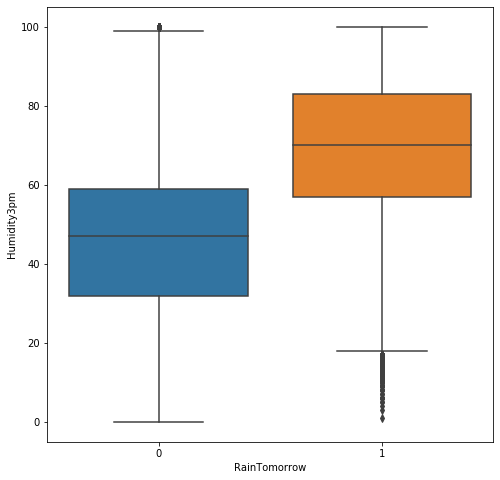

In [39]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="RainTomorrow",y="Humidity3pm")

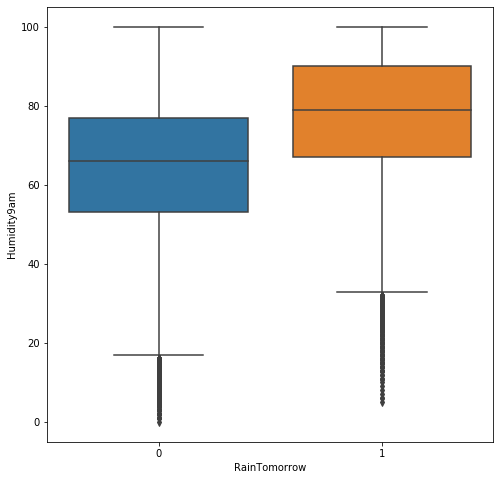

In [40]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="RainTomorrow",y="Humidity9am")

/Users/davidwan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

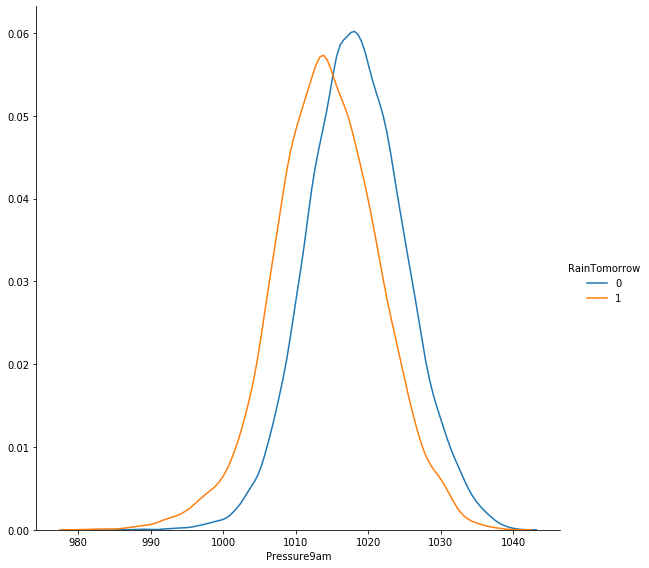

In [41]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df, hue="RainTomorrow", size=8).map(sns.kdeplot, "Pressure9am").add_legend()
plt.ioff() 
plt.show()

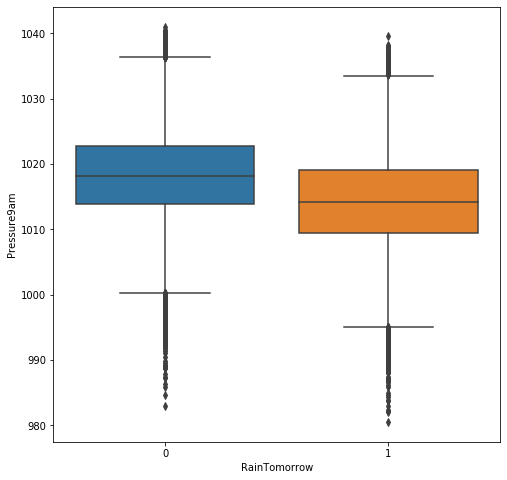

In [42]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="RainTomorrow",y="Pressure9am")

/Users/davidwan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

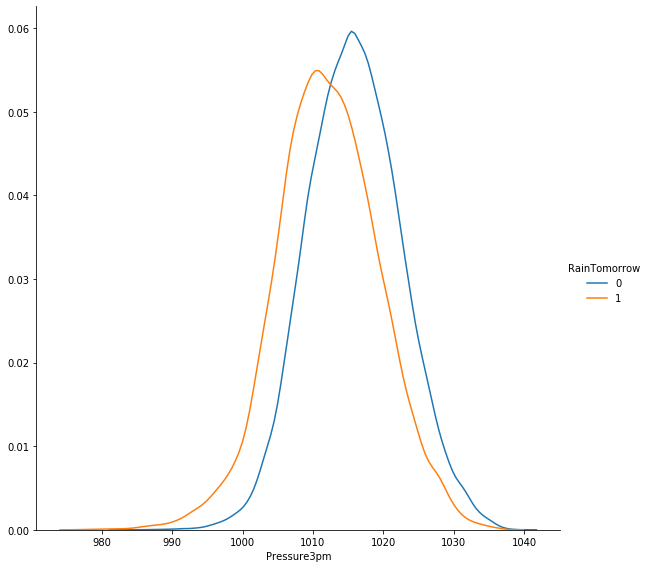

In [43]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df, hue="RainTomorrow", size=8).map(sns.kdeplot, "Pressure3pm").add_legend()
plt.ioff() 
plt.show()

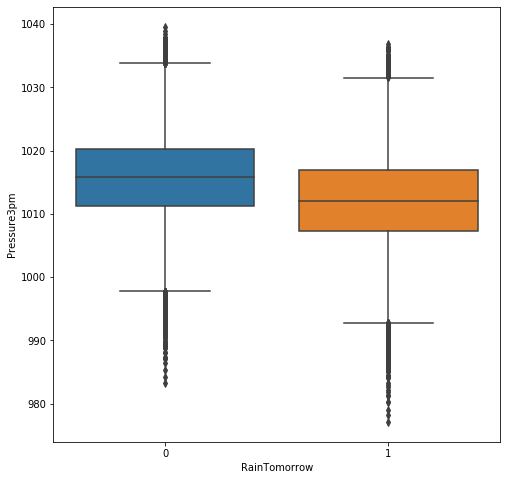

In [44]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="RainTomorrow",y="Pressure3pm")

/Users/davidwan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

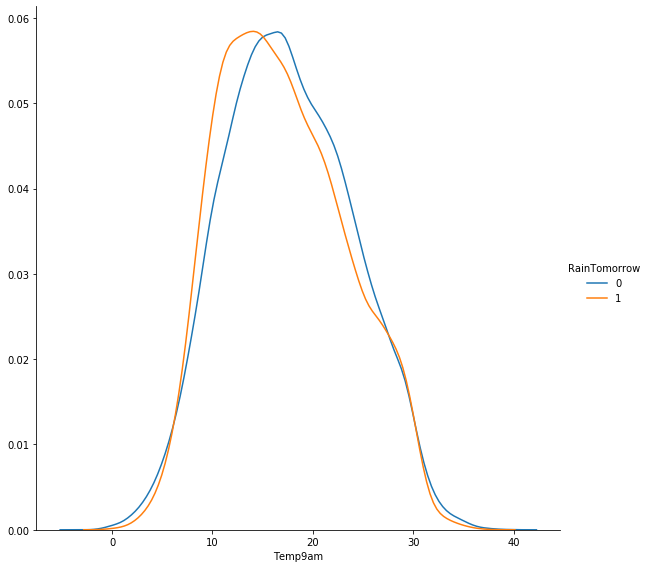

In [45]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df, hue="RainTomorrow", size=8).map(sns.kdeplot, "Temp9am").add_legend()
plt.ioff() 
plt.show()

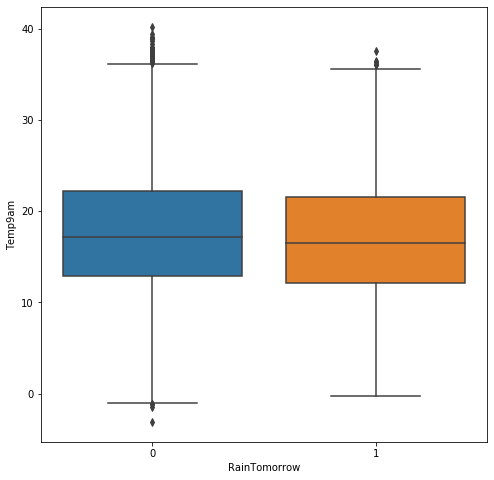

In [46]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="RainTomorrow",y="Temp9am")

/Users/davidwan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

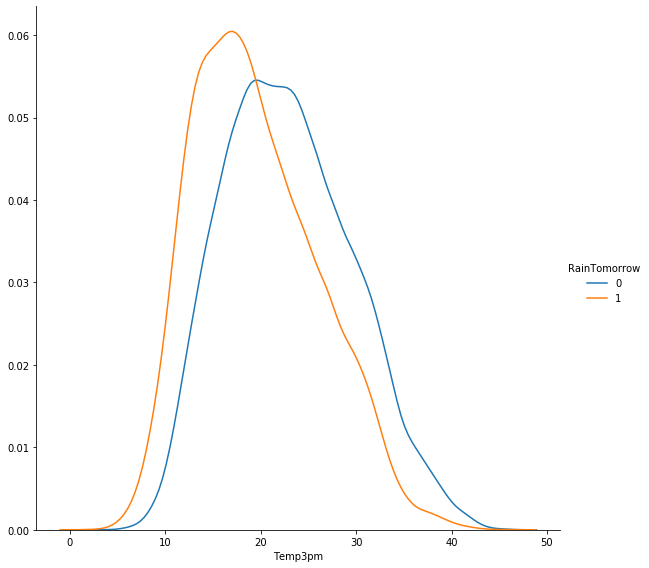

In [47]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df, hue="RainTomorrow", size=8).map(sns.kdeplot, "Temp3pm").add_legend()
plt.ioff() 
plt.show()

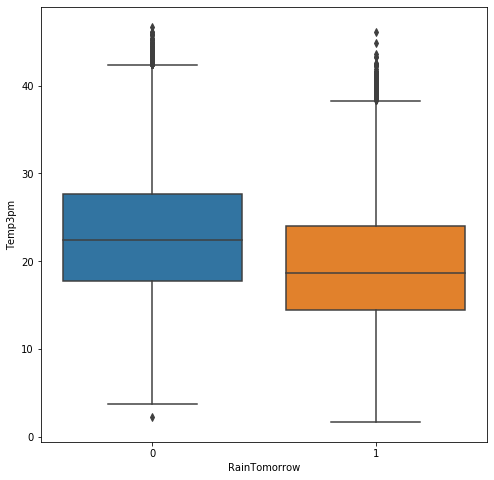

In [48]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="RainTomorrow",y="Temp3pm")

In [49]:
y = df['RainTomorrow']
df = df.drop(columns=['RainTomorrow'])
df['WindGustDir']= encoder.fit_transform(df['WindGustDir'])
df['WindDir3pm']= encoder.fit_transform(df['WindDir9am'])
df['WindDir9am']= encoder.fit_transform(df['WindDir9am'])
X = df
#X = pd.get_dummies(df,columns=['WindGustDir', 'WindDir3pm', 'WindDir9am'])

In [50]:
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13,44.0,13,13,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,14,44.0,6,6,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,15,46.0,13,13,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,4,24.0,9,9,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,13,41.0,1,1,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [52]:
n_fold = 20
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=11)

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)


In [54]:
from lightgbm import LGBMClassifier
import lightgbm as lgbm

/Users/davidwan/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [55]:
from sklearn.metrics import accuracy_score

In [56]:
def lgbm_evaluate(**params):
    #warnings.simplefilter('ignore')
    
    params['num_leaves'] = int(params['num_leaves'])
    params['max_depth'] = int(params['max_depth'])
        
    clf = lgbm.LGBMClassifier(**params, n_estimators=20000, nthread=-1)

    test_pred_proba = np.zeros((X_train.shape[0], 2))
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train, y_train)):
        X_train_bo, X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_train_bo, y_valid = y_train.iloc[train_idx], y_train.iloc[valid_idx]
        
        model = lgbm.LGBMClassifier(**params, n_estimators = 10000, n_jobs = -1)
        model.fit(X_train_bo, y_train_bo, 
                eval_set=[(X_train_bo, y_train_bo), (X_valid, y_valid)], eval_metric='binary_logloss',
                verbose=False, early_stopping_rounds=200)

        y_pred_valid = model.predict_proba(X_valid)

        test_pred_proba[valid_idx] = y_pred_valid

    return accuracy_score(y_valid, y_pred_valid.argmax(1))

In [57]:
from bayes_opt import BayesianOptimization

In [54]:
params = {'colsample_bytree': (0.6, 1),
     'learning_rate': (.001, .08), 
      'num_leaves': (8, 124), 
      'subsample': (0.6, 1), 
      'max_depth': (3, 25), 
      'reg_alpha': (.05, 15.0), 
      'reg_lambda': (.05, 15.0), 
      'min_split_gain': (.001, .03),
      'min_child_weight': (12, 80)}

bo = BayesianOptimization(lgbm_evaluate, params)
bo.maximize(init_points=5, n_iter=20)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8595   |  0.7164   |  0.02049  |  9.136    |  34.31    |  0.01203  |  13.31    |  5.667    |  7.348    |  0.9089   |
|  2        |  0.8611   |  0.6217   |  0.04146  |  6.964    |  35.69    |  0.02139  |  35.36    |  7.649    |  12.69    |  0.8774   |
|  3        |  0.8576   |  0.9757   |  0.03842  |  3.402    |  77.36    |  0.01157  |  105.7    |  11.92    |  11.68    |  0.802    |
|  4        |  0.8628   |  0.7657   |  0.04679  |  24.4     |  67.22    |  0.01414  |  52.3     |  3.471    |  11.48    |  0.8535   |
|  5        |  0.8625   |  0.7239   |  0.05439  |  13.7     |  52.2     |  0.02854  |  59.44    |  7.581    |  3.672    |  0.6084   |
|  6        |  0.8618   |  0.9557   |  0.04269  |  24.99    | 

In [58]:
import time

In [59]:
def eval_acc(preds, dtrain):
    labels = dtrain.get_label()
    return 'acc', accuracy_score(labels, preds.argmax(1)), True

def train_model(X, X_test, y, params=None, folds=folds, model_type='lgbm', plot_feature_importance=False, model=None):

    oof = np.zeros((len(X), 2))
    prediction = np.zeros((len(X_test), 2))
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
        print('Fold', fold_n, 'started at', time.ctime())
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
        if model_type == 'lgbm':
            model = lgbm.LGBMClassifier(**params, n_estimators = 10000, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='multi_logloss',
                    verbose=5000, early_stopping_rounds=200)
            
            y_pred_valid = model.predict_proba(X_valid)
            y_pred = model.predict_proba(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train, feature_names=X.columns)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid, feature_names=X.columns)
            
            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
        
        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            
            y_pred_valid = model.predict_proba(X_valid)
            score = accuracy_score(y_valid, y_pred_valid.argmax(1))
            print(f'Fold {fold_n}. Accuracy: {score:.4f}.')
            print('')
            
            y_pred = model.predict_proba(X_test)
        
        if model_type == 'cat':
            model = CatBoostClassifier(iterations=20000,  eval_metric='MAE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid
        scores.append(accuracy_score(y_valid, y_pred_valid.argmax(1)))

        prediction += y_pred
        
        if model_type == 'lgbm':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgbm':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction

In [58]:
print(bo.max)

{'target': 0.8634860651865848, 'params': {'colsample_bytree': 0.656907307082314, 'learning_rate': 0.004297708523444717, 'max_depth': 24.529261125830864, 'min_child_weight': 78.94335056933582, 'min_split_gain': 0.020639032553405635, 'num_leaves': 121.18120203872034, 'reg_alpha': 13.331992691954028, 'reg_lambda': 13.362195421526641, 'subsample': 0.7610099210494645}}


Fold 0 started at Tue Aug 13 13:32:35 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[3265]	training's binary_logloss: 0.287646	training's binary_logloss: 0.287646	valid_1's binary_logloss: 0.331895	valid_1's binary_logloss: 0.331895
Fold 1 started at Tue Aug 13 13:33:44 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[4605]	training's binary_logloss: 0.276713	training's binary_logloss: 0.276713	valid_1's binary_logloss: 0.316499	valid_1's binary_logloss: 0.316499
Fold 2 started at Tue Aug 13 13:35:24 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[4175]	training's binary_logloss: 0.279679	training's binary_logloss: 0.279679	valid_1's binary_logloss: 0.326027	valid_1's binary_logloss: 0.326027
Fold 3 started at Tue Aug 13 13:36:53 2019
Training until validation scores don't improve for 200 rounds.
[5000]	training's binary

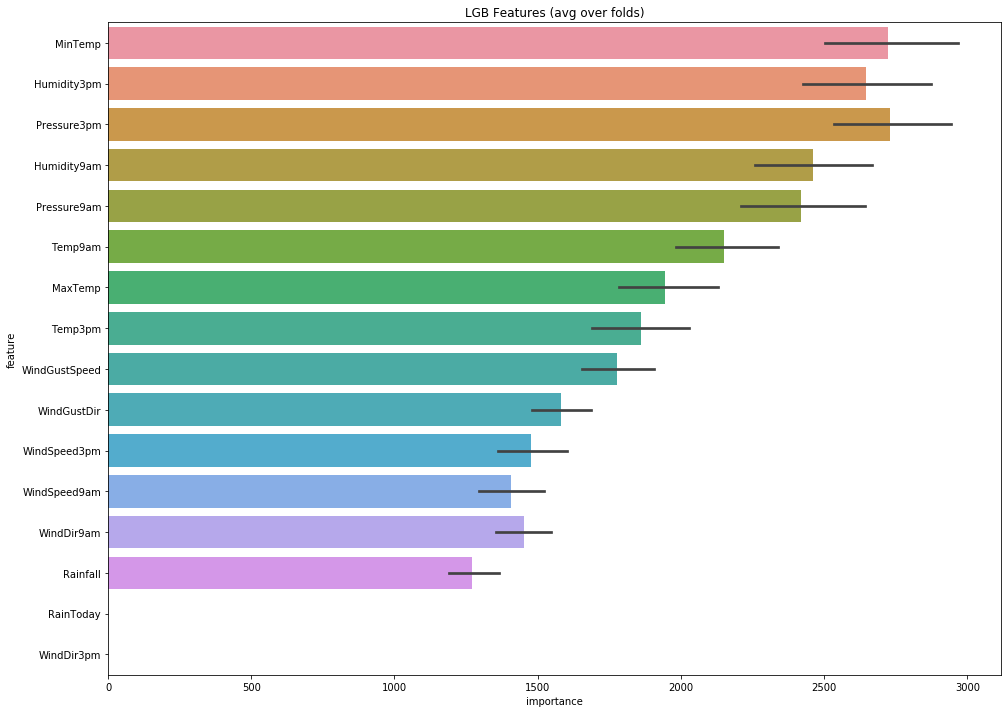

In [60]:

"""params = {'num_leaves': int(bo.max['params']['num_leaves']),
          'min_data_in_leaf': int(bo.max['params']['min_child_weight']),
          'min_split_gain': bo.max['params']['min_split_gain'],
          'objective': 'binary',
          'max_depth': int(bo.max['params']['max_depth']),
          'learning_rate': bo.max['params']['learning_rate'],
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": bo.max['params']['subsample'],
          "bagging_seed": 11,
          "verbosity": -1,
          'reg_alpha': bo.max['params']['reg_alpha'],
          'reg_lambda': bo.max['params']['reg_lambda'],
          "num_class": 1,
          'nthread': -1,
          'categorical_feature': 'auto'
         }
"""
# I use bayesian optimization results
params = {'num_leaves': int(121.2),
          'min_data_in_leaf': int(78.94),
          'min_split_gain': 0.02064,
          'objective': 'binary',
          'max_depth': int(24.53),
          'learning_rate': 0.004298,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.761,
          "bagging_seed": 11,
          "verbosity": -1,
          'reg_alpha': 13.33,
          'reg_lambda': 13.36,
          "num_class": 1,
          'nthread': -1
         }

oof_lgb, prediction_lgb, feature_importance = train_model(X=X_train, X_test=X_test, y=y_train, params=params, model_type='lgbm', plot_feature_importance=True)

In [61]:
print("Test score: ",accuracy_score(y_test,prediction_lgb.argmax(1)))

Test score:  0.8607608387645225


In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
import itertools

def plot_confusion_matrix(truth, pred, classes, normalize=False, title=''):
    cm = confusion_matrix(truth, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', size=15)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.tight_layout()

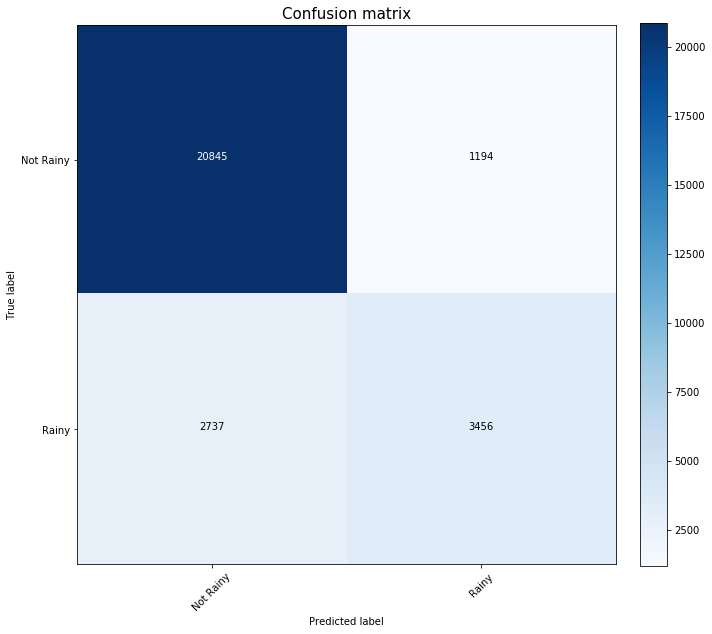

In [64]:
plot_confusion_matrix(y_test, prediction_lgb.argmax(1), ['Not Rainy','Rainy'])

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test, prediction_lgb.argmax(1)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22039
           1       0.74      0.56      0.64      6193

    accuracy                           0.86     28232
   macro avg       0.81      0.75      0.78     28232
weighted avg       0.85      0.86      0.85     28232



In [67]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

In [68]:
rus = RandomUnderSampler(random_state=42)

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [69]:
X_train, y_train = rus.fit_resample(X_train, y_train)

In [70]:
columns = X.columns

In [71]:
X_train = pd.DataFrame(data=X_train,columns=columns )
y_train= pd.DataFrame(data=y_train,columns=['y'])

In [83]:
params = {'colsample_bytree': (0.6, 1),
     'learning_rate': (.001, .08), 
      'num_leaves': (8, 124), 
      'subsample': (0.6, 1), 
      'max_depth': (3, 25), 
      'reg_alpha': (.05, 15.0), 
      'reg_lambda': (.05, 15.0), 
      'min_split_gain': (.001, .03),
      'min_child_weight': (12, 80)}

bo = BayesianOptimization(lgbm_evaluate, params)
bo.maximize(init_points=5, n_iter=20)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  1        |  0.8055   |  0.787    |  0.005626 |  14.81    |  69.59    |  0.02671  |  104.6    |  9.641    |  10.65    |  0.6825   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  2        |  0.8066   |  0.6538   |  0.05416  |  18.29    |  70.91    |  0.01155  |  18.78    |  2.379    |  2.595    |  0.6421   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  3        |  0.8066   |  0.6695   |  0.06571  |  15.25    |  44.85    |  0.01059  |  21.35    |  13.16    |  0.1424   |  0.7826   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  4        |  0.8055   |  0.7806   |  0.04223  |  18.79    |  78.22    |  0.01755  |  89.31    |  11.85    |  5.479    |  0.9454   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  5        |  0.8103   |  0.7488   |  0.03844  |  16.02    |  79.69    |  0.0208   |  107.4    |  2.676    |  5.924    |  0.894    |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  6        |  0.8172   |  0.9777   |  0.004653 |  22.79    |  12.89    |  0.004823 |  123.5    |  0.3599   |  1.531    |  0.6147   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  7        |  0.8092   |  0.7203   |  0.05508  |  3.416    |  13.0     |  0.006167 |  113.6    |  1.385    |  0.255    |  0.7608   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  8        |  0.8103   |  0.6258   |  0.001431 |  24.98    |  13.13    |  0.0047   |  120.6    |  1.018    |  0.3563   |  0.6449   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  9        |  0.8108   |  0.7811   |  0.02976  |  24.84    |  13.7     |  0.01585  |  100.4    |  0.7604   |  13.91    |  0.728    |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  10       |  0.8098   |  0.6789   |  0.0216   |  24.1     |  13.03    |  0.01575  |  116.9    |  1.202    |  0.2608   |  0.8873   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  11       |  0.8087   |  0.6261   |  0.07017  |  24.36    |  14.66    |  0.005458 |  122.5    |  0.8455   |  14.39    |  0.6642   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  12       |  0.8119   |  0.6736   |  0.06215  |  24.68    |  14.09    |  0.02448  |  124.0    |  1.48     |  0.1787   |  0.9637   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  13       |  0.8114   |  0.9781   |  0.04089  |  24.83    |  23.66    |  0.02086  |  122.1    |  0.8244   |  1.398    |  0.744    |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  14       |  0.8135   |  0.8656   |  0.06149  |  23.34    |  12.0     |  0.01258  |  120.3    |  0.5936   |  0.7236   |  0.8795   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  15       |  0.8172   |  0.6608   |  0.03967  |  23.66    |  17.62    |  0.01754  |  119.0    |  0.7303   |  0.6706   |  0.9876   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  16       |  0.8172   |  0.9679   |  0.01869  |  24.7     |  74.02    |  0.01116  |  121.3    |  1.569    |  0.1795   |  0.9974   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  17       |  0.8087   |  0.9177   |  0.03092  |  24.8     |  12.67    |  0.02356  |  14.33    |  0.995    |  1.84     |  0.6171   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  18       |  0.8114   |  0.6114   |  0.05892  |  23.82    |  77.63    |  0.01377  |  121.7    |  0.9656   |  0.06268  |  0.9302   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  19       |  0.8151   |  0.7864   |  0.04253  |  24.54    |  70.09    |  0.002238 |  121.9    |  0.6023   |  1.068    |  0.6692   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  20       |  0.8199   |  0.9783   |  0.06376  |  24.5     |  61.48    |  0.007572 |  119.9    |  0.1607   |  0.8873   |  0.785    |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  21       |  0.8045   |  0.9888   |  0.07662  |  4.181    |  21.81    |  0.02674  |  10.2     |  0.8987   |  14.98    |  0.8412   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  22       |  0.8029   |  0.7668   |  0.07228  |  24.85    |  69.6     |  0.007062 |  11.36    |  14.7     |  14.72    |  0.7019   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  23       |  0.8167   |  0.9476   |  0.0766   |  24.37    |  50.36    |  0.01439  |  77.78    |  0.08801  |  3.808    |  0.9949   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  24       |  0.8092   |  0.8087   |  0.07887  |  24.94    |  56.94    |  0.01454  |  100.7    |  0.1343   |  0.3962   |  0.8898   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  25       |  0.8002   |  0.9874   |  0.07814  |  3.249    |  79.06    |  0.01622  |  42.98    |  13.29    |  12.61    |  0.9898   |


In [84]:
params = {'num_leaves': int(bo.max['params']['num_leaves']),
          'min_data_in_leaf': int(bo.max['params']['min_child_weight']),
          'min_split_gain': bo.max['params']['min_split_gain'],
          'objective': 'binary',
          'max_depth': int(bo.max['params']['max_depth']),
          'learning_rate': bo.max['params']['learning_rate'],
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": bo.max['params']['subsample'],
          "bagging_seed": 11,
          "verbosity": -1,
          'reg_alpha': bo.max['params']['reg_alpha'],
          'reg_lambda': bo.max['params']['reg_lambda'],
          "num_class": 1,
          'nthread': -1
         }

Fold 0 started at Mon Aug 12 03:32:15 2019
Training until validation scores don't improve for 200 rounds.


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Early stopping, best iteration is:
[161]	training's binary_logloss: 0.285829	training's binary_logloss: 0.285829	valid_1's binary_logloss: 0.442376	valid_1's binary_logloss: 0.442376
Fold 1 started at Mon Aug 12 03:32:18 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[198]	training's binary_logloss: 0.266712	training's binary_logloss: 0.266712	valid_1's binary_logloss: 0.414261	valid_1's binary_logloss: 0.414261
Fold 2 started at Mon Aug 12 03:32:21 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[155]	training's binary_logloss: 0.292545	training's binary_logloss: 0.292545	valid_1's binary_logloss: 0.398764	valid_1's binary_logloss: 0.398764
Fold 3 started at Mon Aug 12 03:32:25 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[148]	training's binary_logloss: 0.29674	training's binary_logloss: 0.29674	valid_1's binary_loglo

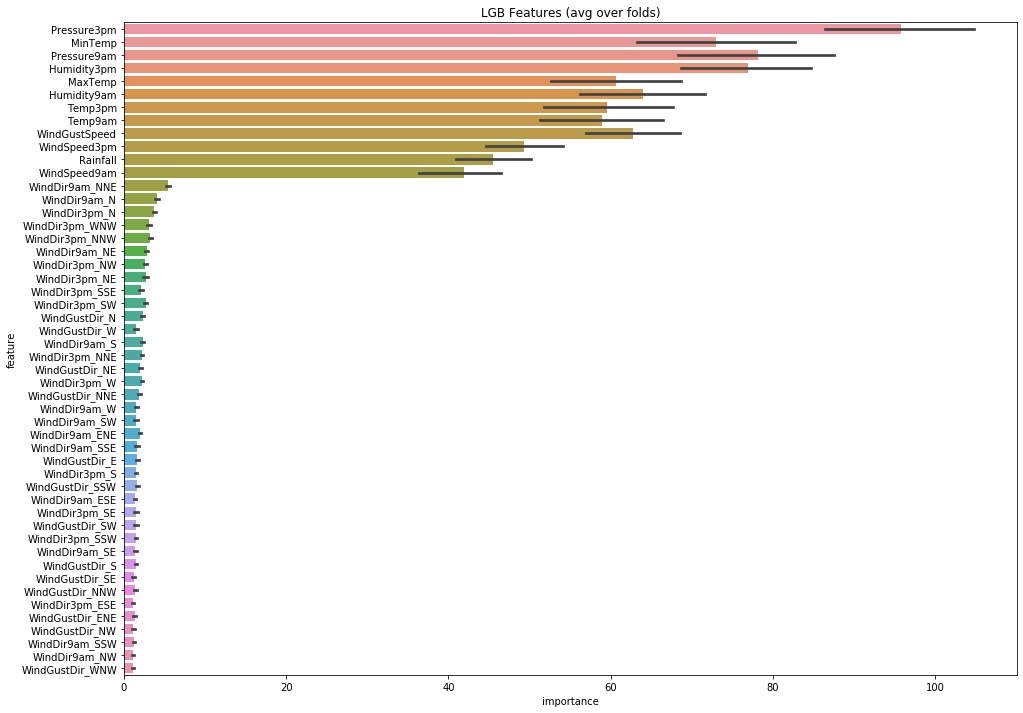

In [85]:
oof_lgb, prediction_lgb, feature_importance = train_model(X=X_train, X_test=X_test, y=y_train, params=params, model_type='lgbm', plot_feature_importance=True)

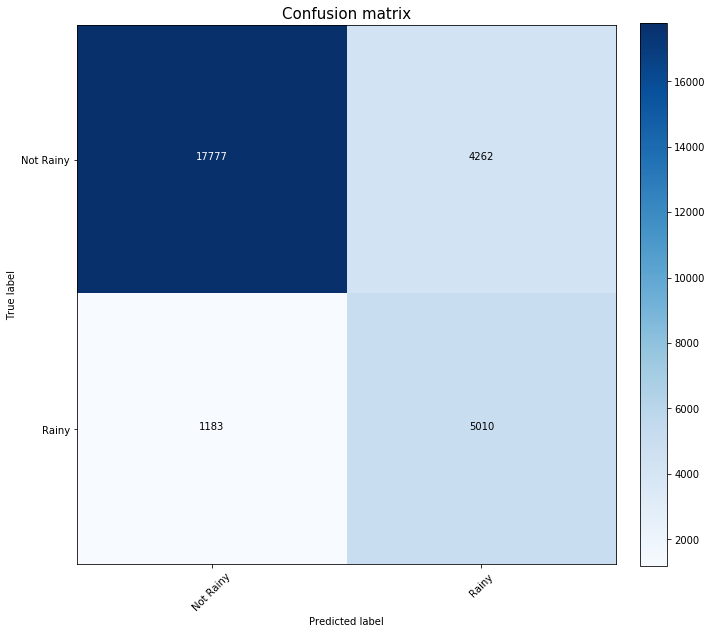

In [88]:
plot_confusion_matrix(y_test, prediction_lgb.argmax(1), ['Not Rainy','Rainy'])

In [87]:
print(classification_report(y_test, prediction_lgb.argmax(1)))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     22039
           1       0.54      0.81      0.65      6193

    accuracy                           0.81     28232
   macro avg       0.74      0.81      0.76     28232
weighted avg       0.85      0.81      0.82     28232



In [89]:
y_train['y'].value_counts()

1    18826
0    18826
Name: y, dtype: int64

In [90]:
y_test.value_counts()

0    22039
1     6193
Name: RainTomorrow, dtype: int64

In [152]:
y.value_counts()

0    87906
1    25019
Name: RainTomorrow, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=23)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)



In [60]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [61]:
X_train = pd.DataFrame(data=X_train,columns=columns )
y_train = pd.DataFrame(data=y_train,columns=['y'])

NameError: name 'columns' is not defined

In [94]:
params = {'colsample_bytree': (0.6, 1),
     'learning_rate': (.001, .08), 
      'num_leaves': (8, 124), 
      'subsample': (0.6, 1), 
      'max_depth': (3, 25), 
      'reg_alpha': (.05, 15.0), 
      'reg_lambda': (.05, 15.0), 
      'min_split_gain': (.001, .03),
      'min_child_weight': (12, 80)}

bo = BayesianOptimization(lgbm_evaluate, params)
bo.maximize(init_points=5, n_iter=20)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  1        |  0.9089   |  0.6196   |  0.05763  |  13.94    |  42.58    |  0.002646 |  98.38    |  2.516    |  1.207    |  0.9244   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  2        |  0.9092   |  0.8669   |  0.0569   |  17.47    |  37.0     |  0.01783  |  79.54    |  10.61    |  5.386    |  0.7216   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  3        |  0.9084   |  0.89     |  0.06318  |  9.874    |  43.1     |  0.01873  |  110.7    |  7.493    |  9.79     |  0.9791   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  4        |  0.9087   |  0.6135   |  0.07087  |  19.25    |  36.47    |  0.02451  |  33.58    |  3.833    |  14.71    |  0.945    |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  5        |  0.91     |  0.9131   |  0.05994  |  9.343    |  74.58    |  0.01942  |  25.76    |  4.257    |  11.95    |  0.781    |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  6        |  0.9066   |  0.9326   |  0.02405  |  3.554    |  79.83    |  0.0191   |  8.285    |  8.923    |  2.276    |  0.9305   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  7        |  0.91     |  0.8412   |  0.07912  |  20.94    |  13.2     |  0.02266  |  123.7    |  1.482    |  13.5     |  0.7606   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  8        |  0.911    |  0.7248   |  0.01676  |  24.35    |  78.9     |  0.01952  |  123.8    |  9.12     |  10.03    |  0.6267   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  9        |  0.9084   |  0.7067   |  0.04347  |  24.91    |  78.73    |  0.01612  |  123.3    |  7.141    |  14.42    |  0.6833   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  10       |  0.9106   |  0.7183   |  0.05183  |  24.43    |  12.23    |  0.01893  |  123.2    |  12.66    |  11.34    |  0.8225   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  11       |  0.9112   |  0.6943   |  0.05847  |  23.3     |  12.02    |  0.01052  |  123.5    |  12.75    |  0.9128   |  0.9212   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  12       |  0.9078   |  0.949    |  0.03649  |  4.504    |  12.19    |  0.007612 |  122.7    |  12.57    |  12.02    |  0.666    |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  13       |  0.9115   |  0.6018   |  0.03043  |  24.93    |  78.56    |  0.00181  |  123.0    |  3.863    |  0.4257   |  0.7219   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  14       |  0.9092   |  0.8906   |  0.02028  |  24.22    |  76.6     |  0.02506  |  123.3    |  1.052    |  1.227    |  0.7464   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  15       |  0.909    |  0.7395   |  0.06376  |  23.81    |  78.34    |  0.02662  |  123.6    |  3.206    |  14.28    |  0.6658   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  16       |  0.9107   |  0.8969   |  0.01188  |  23.72    |  13.21    |  0.01211  |  123.3    |  11.66    |  1.364    |  0.714    |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  17       |  0.9101   |  0.8537   |  0.05418  |  24.13    |  15.88    |  0.01947  |  123.4    |  1.131    |  1.58     |  0.6898   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  18       |  0.9113   |  0.7632   |  0.0794   |  24.05    |  12.64    |  0.02881  |  123.7    |  14.62    |  1.654    |  0.9469   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  19       |  0.91     |  0.6163   |  0.06512  |  23.8     |  13.75    |  0.01204  |  120.5    |  2.221    |  0.2549   |  0.8623   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  20       |  0.9103   |  0.6451   |  0.06475  |  24.25    |  13.31    |  0.004954 |  123.2    |  9.273    |  0.5421   |  0.7316   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  21       |  0.9098   |  0.7852   |  0.01249  |  24.96    |  16.42    |  0.01621  |  123.4    |  11.05    |  0.2352   |  0.6665   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  22       |  0.91     |  0.8188   |  0.007294 |  25.0     |  13.22    |  0.01957  |  123.8    |  13.54    |  0.4769   |  0.7745   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  23       |  0.9104   |  0.6708   |  0.0369   |  24.69    |  12.81    |  0.01703  |  123.1    |  14.54    |  14.97    |  0.9271   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  24       |  0.9103   |  0.9449   |  0.03198  |  24.59    |  12.48    |  0.01414  |  123.0    |  2.899    |  0.8721   |  0.7354   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  25       |  0.9086   |  0.9379   |  0.03932  |  24.76    |  76.33    |  0.003748 |  123.7    |  14.8     |  1.582    |  0.7195   |


In [95]:
params = {'num_leaves': int(bo.max['params']['num_leaves']),
          'min_data_in_leaf': int(bo.max['params']['min_child_weight']),
          'min_split_gain': bo.max['params']['min_split_gain'],
          'objective': 'binary',
          'max_depth': int(bo.max['params']['max_depth']),
          'learning_rate': bo.max['params']['learning_rate'],
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": bo.max['params']['subsample'],
          "bagging_seed": 11,
          "verbosity": -1,
          'reg_alpha': bo.max['params']['reg_alpha'],
          'reg_lambda': bo.max['params']['reg_lambda'],
          "num_class": 1,
          'nthread': -1
         }

Fold 0 started at Mon Aug 12 12:37:57 2019


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.147247	training's binary_logloss: 0.147247	valid_1's binary_logloss: 0.206555	valid_1's binary_logloss: 0.206555
Fold 1 started at Mon Aug 12 12:38:24 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.138161	training's binary_logloss: 0.138161	valid_1's binary_logloss: 0.20321	valid_1's binary_logloss: 0.20321
Fold 2 started at Mon Aug 12 12:38:58 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.148059	training's binary_logloss: 0.148059	valid_1's binary_logloss: 0.207592	valid_1's binary_logloss: 0.207592
Fold 3 started at Mon Aug 12 12:39:27 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.14

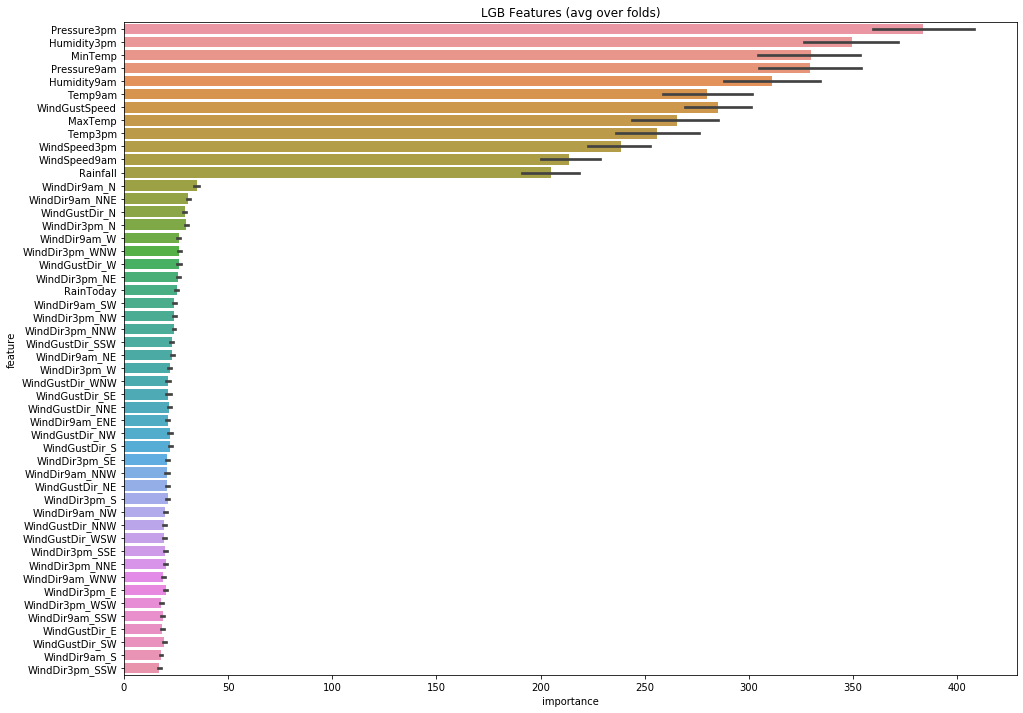

In [96]:
oof_lgb, prediction_lgb, feature_importance = train_model(X=X_train, X_test=X_test, y=y_train, params=params, model_type='lgbm', plot_feature_importance=True)

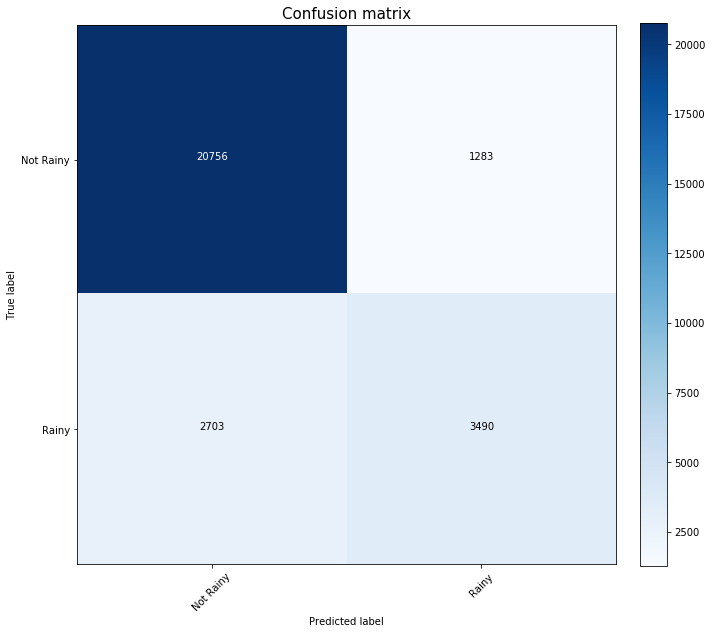

In [97]:
plot_confusion_matrix(y_test, prediction_lgb.argmax(1), ['Not Rainy','Rainy'])

In [98]:
print(classification_report(y_test, prediction_lgb.argmax(1)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22039
           1       0.73      0.56      0.64      6193

    accuracy                           0.86     28232
   macro avg       0.81      0.75      0.77     28232
weighted avg       0.85      0.86      0.85     28232



In [1]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [98]:
df = pd.read_csv('../data/weatherAUS.csv')


In [99]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [100]:
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','RISK_MM','Date'],axis=1)

In [101]:
df = df.dropna()
df.shape

(112925, 18)

In [102]:
df['WindGustDir']= encoder.fit_transform(df['WindGustDir'])

In [103]:
df['WindDir9am']= encoder.fit_transform(df['WindDir9am'])

In [104]:
df['WindDir3pm']= encoder.fit_transform(df['WindDir3pm'])

In [105]:
df['Location']= encoder.fit_transform(df['Location'])

In [106]:
n_fold = 20
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=11)

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [108]:
X_train, y_train = rus.fit_resample(X_train, y_train)

In [109]:
X_train = pd.DataFrame(data=X_train,columns=columns )
y_train = pd.DataFrame(data=y_train,columns=['y'])

In [110]:
params = {'colsample_bytree': (0.6, 1),
     'learning_rate': (.001, .08), 
      'num_leaves': (8, 124), 
      'subsample': (0.6, 1), 
      'max_depth': (3, 25), 
      'reg_alpha': (.05, 15.0), 
      'reg_lambda': (.05, 15.0), 
      'min_split_gain': (.001, .03),
      'min_child_weight': (12, 80)}

bo = BayesianOptimization(lgbm_evaluate, params)
bo.maximize(init_points=5, n_iter=20)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  1        |  0.8077   |  0.6612   |  0.07802  |  8.89     |  59.6     |  0.02536  |  23.44    |  8.198    |  14.52    |  0.6351   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  2        |  0.8108   |  0.8769   |  0.0415   |  9.383    |  55.38    |  0.003387 |  106.0    |  6.248    |  6.248    |  0.7701   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  3        |  0.8071   |  0.8058   |  0.01218  |  8.438    |  44.19    |  0.02785  |  50.11    |  5.348    |  3.161    |  0.7628   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  4        |  0.8071   |  0.9943   |  0.0296   |  4.379    |  35.96    |  0.02357  |  60.85    |  7.337    |  13.46    |  0.9664   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  5        |  0.8135   |  0.7307   |  0.05527  |  16.9     |  21.51    |  0.02031  |  45.18    |  0.5908   |  11.09    |  0.8222   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  6        |  0.8061   |  0.8242   |  0.06327  |  24.95    |  14.43    |  0.01838  |  120.6    |  13.99    |  7.979    |  0.7081   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  7        |  0.8124   |  0.9944   |  0.01827  |  24.6     |  79.24    |  0.02773  |  105.7    |  0.6326   |  14.4     |  0.8642   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  8        |  0.8162   |  0.6943   |  0.07263  |  16.46    |  12.79    |  0.005469 |  120.2    |  0.135    |  14.78    |  0.7753   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  9        |  0.8077   |  0.9695   |  0.05495  |  4.596    |  13.57    |  0.02279  |  118.4    |  0.4481   |  14.35    |  0.7561   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  10       |  0.8082   |  0.7429   |  0.07461  |  7.127    |  12.6     |  0.02051  |  8.994    |  0.07054  |  11.73    |  0.8732   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  11       |  0.8135   |  0.6274   |  0.04105  |  24.71    |  41.22    |  0.007074 |  122.5    |  0.292    |  1.135    |  0.6384   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  12       |  0.8098   |  0.9625   |  0.04587  |  24.56    |  65.66    |  0.01054  |  116.0    |  0.1611   |  14.98    |  0.7929   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  13       |  0.8119   |  0.7569   |  0.05419  |  4.447    |  79.56    |  0.002243 |  8.445    |  0.5186   |  10.32    |  0.6782   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  14       |  0.8045   |  0.727    |  0.07976  |  3.444    |  79.68    |  0.01593  |  88.24    |  0.2875   |  2.756    |  0.6782   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  15       |  0.8013   |  0.6527   |  0.04807  |  22.95    |  77.49    |  0.02141  |  9.184    |  14.28    |  0.1123   |  0.6619   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  16       |  0.805    |  0.6858   |  0.003362 |  24.62    |  64.79    |  0.0196   |  10.31    |  0.7133   |  13.04    |  0.9023   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  17       |  0.8172   |  0.8238   |  0.06045  |  24.96    |  13.56    |  0.01492  |  95.78    |  0.4604   |  4.786    |  0.9685   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  18       |  0.8023   |  0.6242   |  0.01355  |  24.36    |  77.44    |  0.02794  |  111.8    |  14.7     |  0.8045   |  0.899    |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  19       |  0.8092   |  0.7901   |  0.02227  |  24.55    |  45.87    |  0.0107   |  85.48    |  1.073    |  14.54    |  0.6205   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  20       |  0.7997   |  0.7886   |  0.01617  |  4.597    |  79.65    |  0.002844 |  118.1    |  14.46    |  14.11    |  0.9888   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  21       |  0.8108   |  0.8093   |  0.02544  |  20.42    |  13.31    |  0.01603  |  122.7    |  0.6927   |  0.1075   |  0.8511   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  22       |  0.8061   |  0.7061   |  0.04376  |  24.64    |  12.58    |  0.01518  |  18.25    |  14.07    |  13.72    |  0.8424   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  23       |  0.8103   |  0.6199   |  0.04718  |  24.01    |  12.04    |  0.02984  |  72.26    |  0.2567   |  14.44    |  0.612    |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  24       |  0.8071   |  0.637    |  0.004774 |  24.28    |  20.35    |  0.008193 |  8.694    |  0.1725   |  0.4075   |  0.7344   |


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


|  25       |  0.8023   |  0.9473   |  0.03734  |  4.144    |  14.14    |  0.00999  |  19.62    |  14.94    |  1.368    |  0.9882   |


In [111]:
params = {'num_leaves': int(bo.max['params']['num_leaves']),
          'min_data_in_leaf': int(bo.max['params']['min_child_weight']),
          'min_split_gain': bo.max['params']['min_split_gain'],
          'objective': 'binary',
          'max_depth': int(bo.max['params']['max_depth']),
          'learning_rate': bo.max['params']['learning_rate'],
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": bo.max['params']['subsample'],
          "bagging_seed": 11,
          "verbosity": -1,
          'reg_alpha': bo.max['params']['reg_alpha'],
          'reg_lambda': bo.max['params']['reg_lambda'],
          "num_class": 1,
          'nthread': -1
         }

Fold 0 started at Mon Aug 12 18:10:15 2019
Training until validation scores don't improve for 200 rounds.


/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Early stopping, best iteration is:
[153]	training's binary_logloss: 0.324599	training's binary_logloss: 0.324599	valid_1's binary_logloss: 0.44081	valid_1's binary_logloss: 0.44081
Fold 1 started at Mon Aug 12 18:10:18 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[230]	training's binary_logloss: 0.294658	training's binary_logloss: 0.294658	valid_1's binary_logloss: 0.411516	valid_1's binary_logloss: 0.411516
Fold 2 started at Mon Aug 12 18:10:21 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.278631	training's binary_logloss: 0.278631	valid_1's binary_logloss: 0.401839	valid_1's binary_logloss: 0.401839
Fold 3 started at Mon Aug 12 18:10:24 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[234]	training's binary_logloss: 0.292724	training's binary_logloss: 0.292724	valid_1's binary_loglo

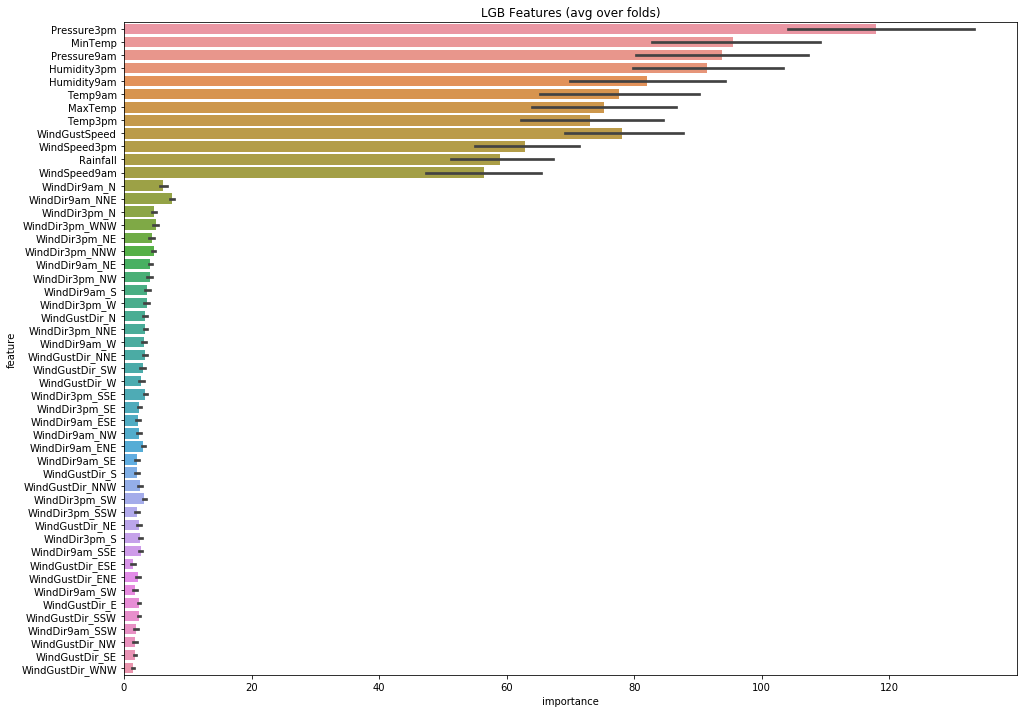

In [116]:
oof_lgb, prediction_lgb, feature_importance = train_model(X=X_train, X_test=X_test, y=y_train, params=params, model_type='lgbm', plot_feature_importance=True)

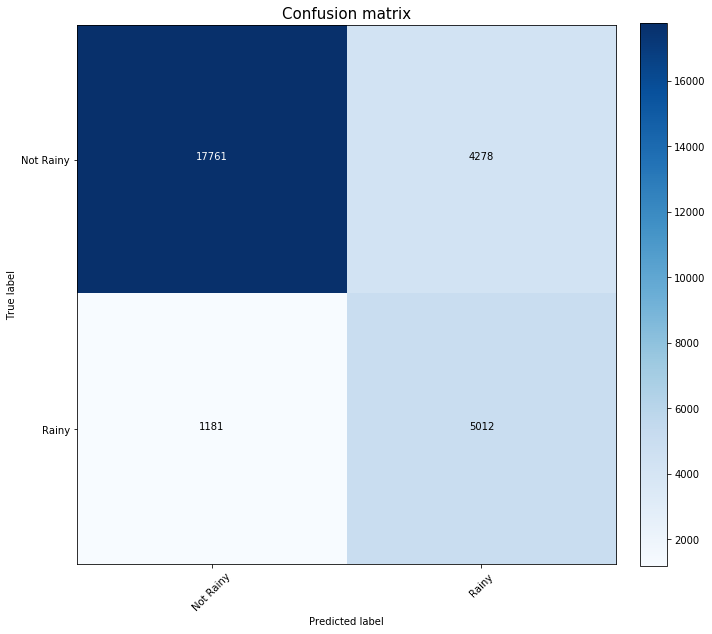

In [120]:
plot_confusion_matrix(y_test, prediction_lgb.argmax(1), ['Not Rainy','Rainy'])

In [121]:
print(classification_report(y_test, prediction_lgb.argmax(1)))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     22039
           1       0.54      0.81      0.65      6193

    accuracy                           0.81     28232
   macro avg       0.74      0.81      0.76     28232
weighted avg       0.85      0.81      0.82     28232



In [122]:
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
from sklearn.linear_model import LogisticRegression

In [126]:
logmodel = LogisticRegression()

In [127]:
logmodel.fit(X_train, y_train)

/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
predictions = logmodel.predict(X_test)

In [129]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     22039
           1       0.52      0.77      0.62      6193

    accuracy                           0.79     28232
   macro avg       0.72      0.79      0.74     28232
weighted avg       0.84      0.79      0.81     28232



In [1]:
params = {'num_leaves': int(bo.max['params']['num_leaves']),
          'min_data_in_leaf': int(bo.max['params']['min_child_weight']),
          'min_split_gain': bo.max['params']['min_split_gain'],
          'objective': 'binary',
          'max_depth': int(bo.max['params']['max_depth']),
          'learning_rate': bo.max['params']['learning_rate'],
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": bo.max['params']['subsample'],
          "bagging_seed": 11,
          "verbosity": -1,
          'reg_alpha': bo.max['params']['reg_alpha'],
          'reg_lambda': bo.max['params']['reg_lambda'],
          "num_class": 1,
          'nthread': -1,
          'scale_pos_weight': 4,
          'categorical_feature': 'auto'
         }

NameError: name 'bo' is not defined

In [ ]:
oof_lgb, prediction_lgb, feature_importance = train_model(X=X_train, X_test=X_test, y=y_train, params=params, model_type='lgbm', plot_feature_importance=True)

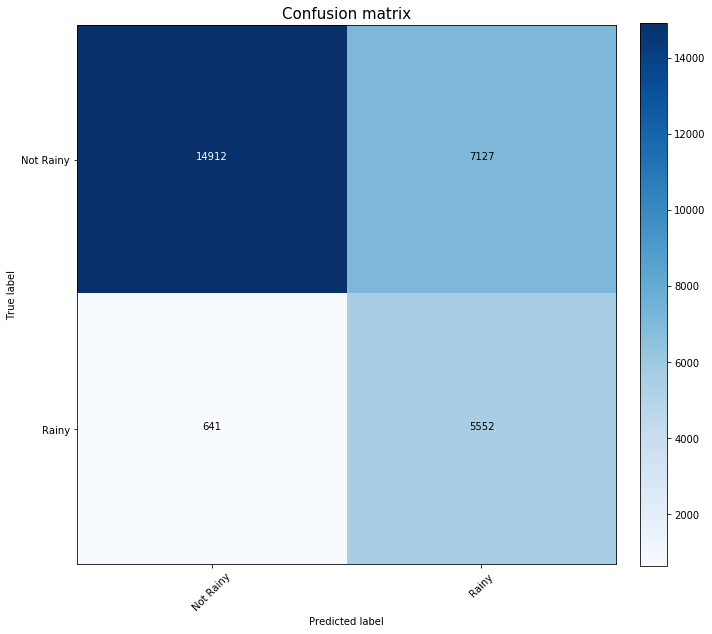

In [137]:
plot_confusion_matrix(y_test, prediction_lgb.argmax(1), ['Not Rainy','Rainy'])

In [138]:
print(classification_report(y_test, prediction_lgb.argmax(1)))

              precision    recall  f1-score   support

           0       0.96      0.68      0.79     22039
           1       0.44      0.90      0.59      6193

    accuracy                           0.72     28232
   macro avg       0.70      0.79      0.69     28232
weighted avg       0.84      0.72      0.75     28232



In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV